In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ftrs_dir = '../../../data/features'
ctlg_dir = '../../../data/catalogues'

xmatch_path = f'{ctlg_dir}/gaia-sdss/cross-match-labels.csv'
fats_path = f'{ftrs_dir}/gaia/FATS/FATS_GAIA.dat'

In [3]:
fats = pd.read_csv(fats_path)
fats = fats.set_index('ID')
cls = fats.Class
fats = fats.drop('Class', axis=1)

xmatch = pd.read_csv(xmatch_path, usecols=['source_id_gaia'])

In [4]:
fats.describe()

,Amplitude,AndersonDarling,Autocor_length,Con,Eta_e,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,...,PeriodLS,Period_fit,Psi_CS,Psi_eta,Q31,Rcs,Skew,SlottedA_length,SmallKurtosis,Std
count,200669.000000,200669.000000,200669.000000,200669.000000,2.006690e+05,200669.000000,200669.000000,200669.000000,200669.000000,200669.000000,...,200669.000000,200669.000000,200669.000000,200669.000000,200669.000000,200669.000000,200669.000000,200669.000000,200669.000000,200669.000000
mean,0.356194,0.937302,2.062222,0.001212,2.896656e+04,0.206497,0.355241,0.512039,0.673282,0.860889,...,105.908304,0.295930,0.306698,0.692520,0.341860,0.261966,-0.188278,5.873083,-0.347837,0.221497
std,0.271711,0.142073,1.580630,0.007241,3.304878e+06,0.112091,0.142606,0.151633,0.143211,0.103530,...,276.866335,0.353350,0.059720,0.376351,0.313569,0.094387,0.604255,9.716280,1.148951,0.178211
min,0.050792,0.110900,1.000000,0.000000,3.890648e-01,0.001687,0.003167,0.006041,0.012819,0.088982,...,0.054367,0.000000,0.132645,0.010864,0.007683,0.029167,-4.447674,0.073853,-2.033755,0.025378
25%,0.186093,0.963348,1.000000,0.000000,1.778100e+02,0.124237,0.255463,0.412196,0.582512,0.807681,...,0.578927,0.008208,0.261232,0.406622,0.164543,0.184958,-0.596010,0.073975,-1.070604,0.114993
50%,0.278772,0.998826,1.000000,0.000000,8.002217e+03,0.192851,0.348425,0.513206,0.682317,0.884673,...,1.354600,0.112397,0.297755,0.623076,0.266075,0.250375,-0.230997,0.147949,-0.630011,0.170875
75%,0.422388,0.999993,3.000000,0.000000,3.100896e+04,0.271943,0.447524,0.615310,0.778957,0.939349,...,34.990252,0.533712,0.345839,0.910716,0.385042,0.339093,0.169635,11.909912,0.030549,0.256888
max,3.452071,1.000000,34.000000,0.125000,1.459391e+09,0.912962,0.969089,0.981342,0.994295,0.999801,...,4007.871094,1.000000,0.496244,3.019829,3.143382,0.496244,4.415321,135.817383,26.480636,1.747553


In [5]:
ids_x = xmatch.source_id_gaia[xmatch.source_id_gaia.isin(fats.index)].values
fats_x = fats.loc[ids_x]

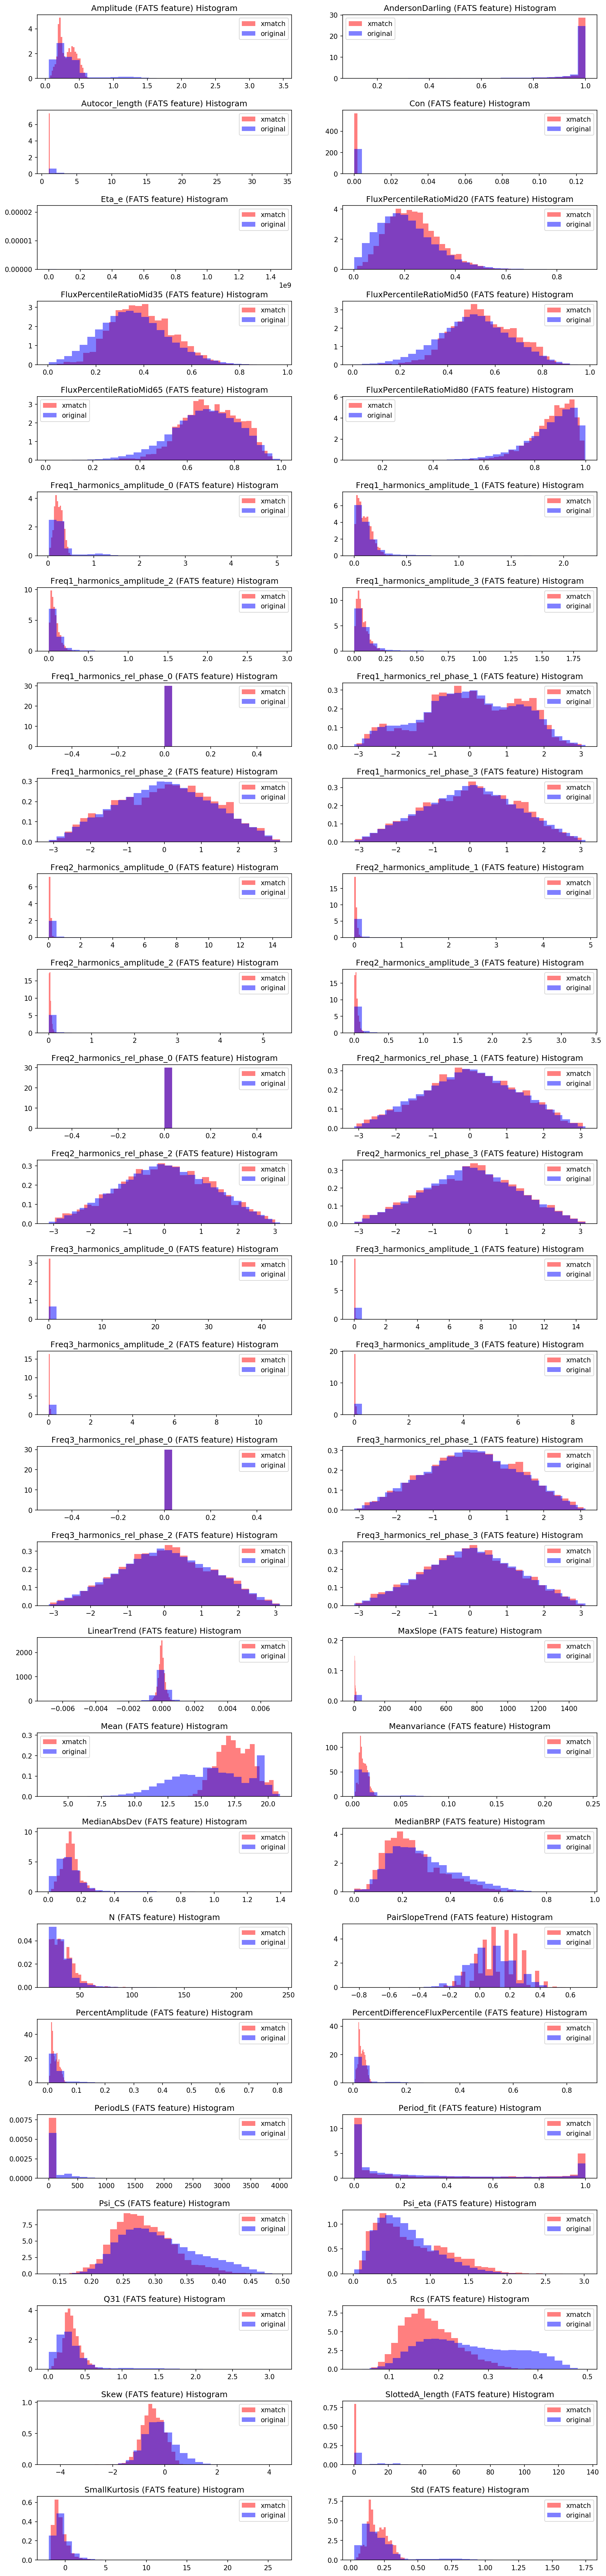

In [6]:
features = fats.columns.values
n = len(fats.columns)
nrows = n//2 + n%2
fig, axes = plt.subplots(nrows, 2, figsize=(15,70), dpi=150)

for feature, ax in zip(features, axes.flatten()):
    ax.hist(fats_x[feature], color='r', alpha=0.5, density=True, bins=30, label='xmatch')
    ax.hist(fats[feature], color='b', alpha=0.5, density=True, bins=30, label='original')
    ax.set_title('{} (FATS feature) Histogram'.format(feature))
    ax.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Without outliers 

In [8]:
q1 = np.percentile(fats, 25, axis=0)
q3 = np.percentile(fats, 75, axis=0)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

outliers = (fats < low) | (fats > high)
drop = outliers.sum(axis=1).astype(bool)
keep = ~drop
fats_clean = fats[keep]
keep = xmatch.source_id_gaia[xmatch.source_id_gaia.isin(fats_clean.index)]
fats_x_clean = fats.loc[keep]

In [9]:
fats_x_clean.shape, fats_clean.shape

((1830, 54), (80446, 54))

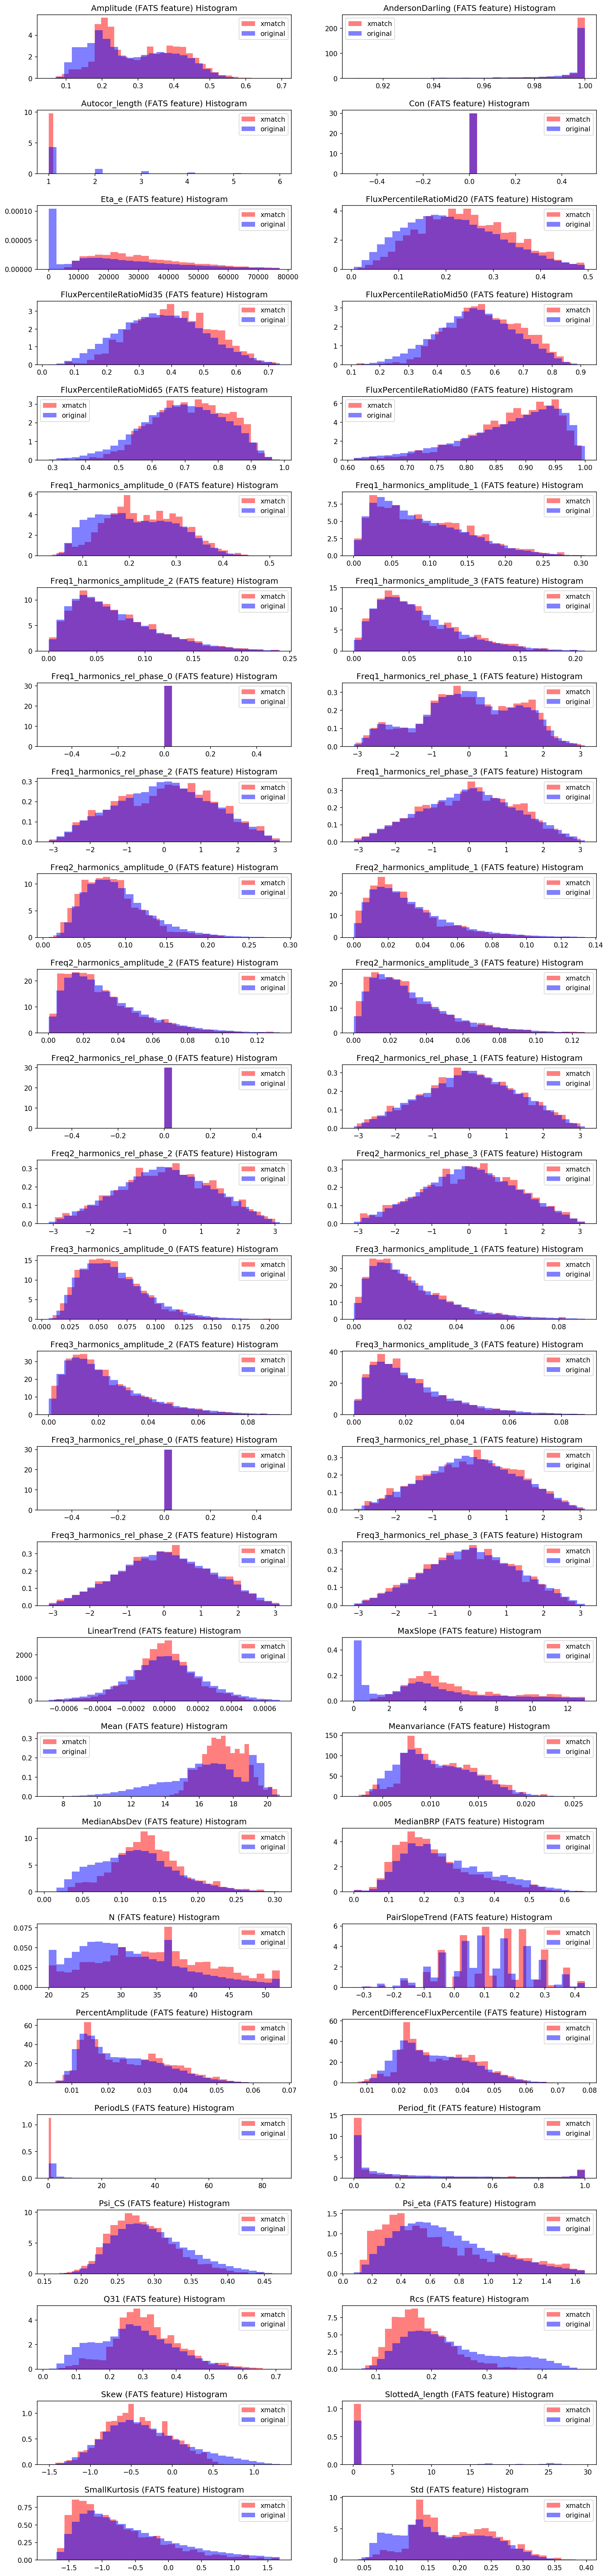

In [10]:
features = fats.columns.values
n = len(fats.columns)
nrows = n//2 + n%2
fig, axes = plt.subplots(nrows, 2, figsize=(15,70), dpi=150)

for feature, ax in zip(features, axes.flatten()):
    ax.hist(fats_x_clean[feature], color='r', alpha=0.5, density=True, bins=30, label='xmatch')
    ax.hist(fats_clean[feature], color='b', alpha=0.5, density=True, bins=30, label='original')
    ax.set_title('{} (FATS feature) Histogram'.format(feature))
    ax.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(fats)

PCA(n_components=2)

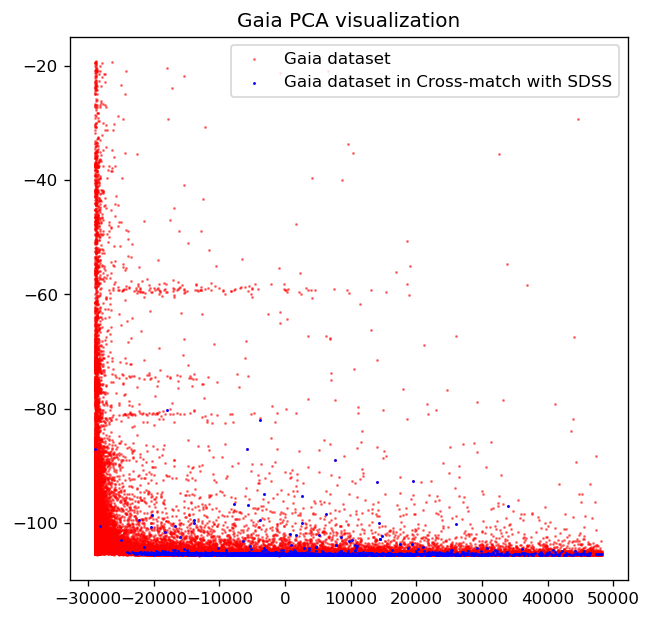

In [12]:
fats_pca = pca.transform(fats_clean)
fats_x_pca = pca.transform(fats_x_clean) 

plt.figure(figsize=(6,6), dpi=120)
plt.scatter(fats_pca[:,0], fats_pca[:,1], c='r', label='Gaia dataset', s=0.5, alpha=0.5)
plt.scatter(fats_x_pca[:,0], fats_x_pca[:,1], c='b', label='Gaia dataset in Cross-match with SDSS', s=0.5)
plt.title('Gaia PCA visualization')
plt.legend()
plt.show()

In [13]:
import matplotlib.cm as cm

In [15]:
labels = f'{ctlg_dir}/gaia/gaia-vari-classifier-result.csv'
labels = pd.read_csv(labels)
labels = labels.rename({'source_id': 'ID'}, axis=1).set_index('ID', drop=True)
fats_clean_score = labels.loc[fats_clean.index].best_class_score
fats_x_clean_score = labels.loc[fats_x_clean.index].best_class_score

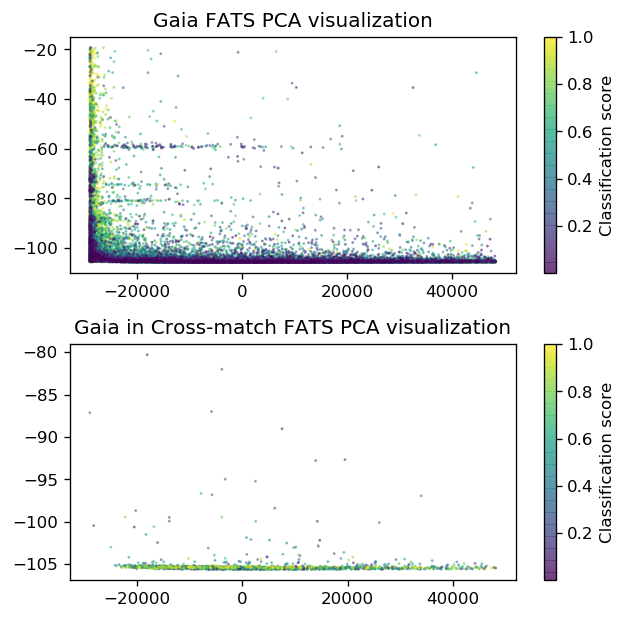

In [16]:
fats_pca = pca.transform(fats_clean)
fats_x_pca = pca.transform(fats_x_clean) 

fig, axes = plt.subplots(2,1, figsize=(6,6), dpi=120)

ax = axes[0]
_ = ax.scatter(fats_pca[:,0], fats_pca[:,1], s=0.5, c=fats_clean_score, cmap=cm.viridis, alpha=0.5)
fig.colorbar(_, ax=ax, label='Classification score')
ax.set_title('Gaia FATS PCA visualization')

ax = axes[1]
_ = ax.scatter(fats_x_pca[:,0], fats_x_pca[:,1], s=0.5, c=fats_x_clean_score, cmap=cm.viridis, alpha=0.5)
fig.colorbar(_, ax=ax, label='Classification score')
ax.set_title('Gaia in Cross-match FATS PCA visualization')

plt.subplots_adjust(hspace=0.3)
plt.show()

In [17]:
var0 = 'Amplitude'
var1 = 'AndersonDarling'
var2 = 'PeriodLS'
vars_ = [var0, var1, var2]
aux = fats_x_clean[vars_]